In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_financial as npf
import pandas as pd
import quandl

In [2]:
annual_int_rate = 0.12
periodicity = 4
N = 5
fv = 500
pmt = 0
rate = annual_int_rate / periodicity
nper = N * periodicity

In [3]:
pv = npf.pv(rate, nper, pmt, fv)
print(pv)

-276.83787709316726


In [4]:
periodicity = 12
N = 5
fv = -500
pmt = 0
pv = 275.22
nper = N * periodicity

In [5]:
rate = npf.rate(nper, pmt, pv, fv)
print(rate * periodicity)

0.1200035288871235


In [6]:
cf = [-10, 4, 3, 2, 1, 10]
int_rate = 0.2426

In [7]:
irr = npf.irr(cf)
print(irr)

0.24257329788961113


In [8]:
npv = npf.npv(int_rate, cf)
print(npv)

-0.0006186467196380718


In [9]:
# NPV profile
cf = [-145, 100, 100, 100, 100, -275]
disc_rates = np.linspace(0.02, 0.32, 16)
npvs = []

for i in range(len(disc_rates)):
    npvs.append(npf.npv(disc_rates[i], cf))

print(npvs)

[-13.303102835797944, -8.040431933136404, -3.985436268200033, -0.9476951798488642, 1.2331807936616315, 2.6925493400257494, 3.54484775091521, 3.886984585797677, 3.8011460077677413, 3.3571244855966995, 2.61425648251803, 1.623039048555782, 0.4264819428359061, -0.9387587010860301, -2.4414276595572773, -4.05486818543001]


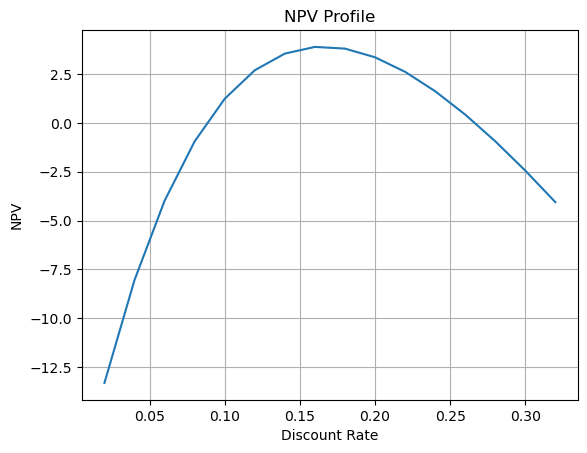

In [10]:
# use matplotlib to plot the NPV profile
plt.plot(disc_rates, npvs)
plt.xlabel('Discount Rate')
plt.ylabel('NPV')
plt.title('NPV Profile')
plt.grid(True)
plt.show()

In [11]:
# create a function for the past two cells
def npv_profile(cf, disc_rates):
    npvs = []
    for i in range(len(disc_rates)):
        npvs.append(npf.npv(disc_rates[i], cf))

    plt.plot(disc_rates, npvs)
    plt.xlabel('Discount Rate')
    plt.ylabel('NPV')
    plt.title('NPV Profile')
    plt.grid(True)
    plt.show()

    return npvs

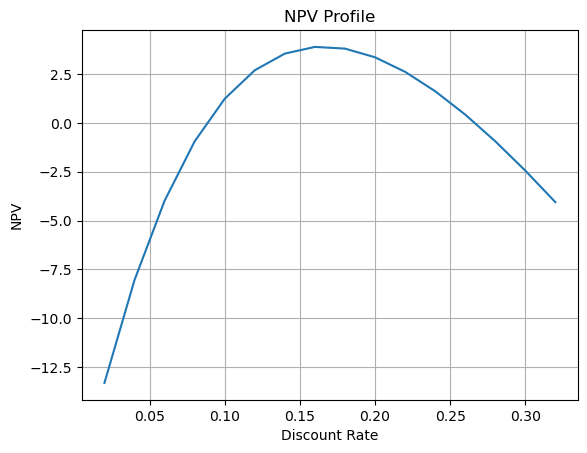

[-13.303102835797944, -8.040431933136404, -3.985436268200033, -0.9476951798488642, 1.2331807936616315, 2.6925493400257494, 3.54484775091521, 3.886984585797677, 3.8011460077677413, 3.3571244855966995, 2.61425648251803, 1.623039048555782, 0.4264819428359061, -0.9387587010860301, -2.4414276595572773, -4.05486818543001]


In [12]:
cf = [-145, 100, 100, 100, 100, -275]
disc_rates = np.linspace(0.02, 0.32, 16)

npvs = npv_profile(cf, disc_rates)
print(npvs)

In [13]:
aapl = quandl.get('WIKI/AAPL', start_date='2006-10-01', end_date='2012-01-01')
aapl

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.300,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.190,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.160,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.130,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.810,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-23,399.69,403.590,399.495,403.33,9621400.0,0.0,1.0,51.365736,51.866940,51.340676,51.833526,67349800.0
2011-12-27,403.10,409.090,403.020,406.53,9467000.0,0.0,1.0,51.803968,52.573767,51.793687,52.244771,66269000.0
2011-12-28,406.89,408.250,401.340,402.64,8166500.0,0.0,1.0,52.291036,52.465815,51.577784,51.744852,57165500.0


In [16]:
aapl.to_csv('aapl_2006_2012.csv')

In [27]:
aapl_new = pd.read_csv('aapl_2006_2012.csv', header=0, index_col='Date', parse_dates=True)
aapl_new

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.300,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.190,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.160,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.130,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.810,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-23,399.69,403.590,399.495,403.33,9621400.0,0.0,1.0,51.365736,51.866940,51.340676,51.833526,67349800.0
2011-12-27,403.10,409.090,403.020,406.53,9467000.0,0.0,1.0,51.803968,52.573767,51.793687,52.244771,66269000.0
2011-12-28,406.89,408.250,401.340,402.64,8166500.0,0.0,1.0,52.291036,52.465815,51.577784,51.744852,57165500.0


In [28]:
aapl_new.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.0,1323.0,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03
mean,202.303670,204.674047,199.552209,202.224393,2.689852e+07,0.0,1.0,25.998841,26.303468,25.645240,25.988653,1.882896e+08
std,98.862163,99.387200,98.208529,98.837774,1.467152e+07,0.0,0.0,12.705166,12.772640,12.621165,12.702032,1.027007e+08
min,73.420000,73.980000,72.600000,73.230000,5.624800e+06,0.0,1.0,9.435493,9.507461,9.330112,9.411076,3.937360e+07
25%,122.205000,124.270000,120.275000,122.020000,1.602910e+07,0.0,1.0,15.705046,15.970427,15.457014,15.681271,1.122037e+08
50%,176.260000,179.500000,173.080000,175.840000,2.328380e+07,0.0,1.0,22.651867,23.068252,22.243192,22.597891,1.629866e+08
75%,271.440000,273.927500,268.460000,270.900000,3.308900e+07,0.0,1.0,34.883823,35.203502,34.500852,34.814426,2.316230e+08
max,421.760000,426.700000,415.990000,422.240000,1.204632e+08,0.0,1.0,54.202038,54.836897,53.460513,54.263725,8.432424e+08


<Axes: xlabel='Date'>

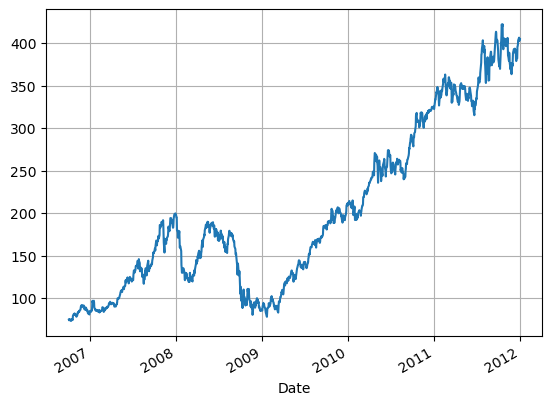

In [29]:
aapl_new['Close'].plot(grid=True)

In [30]:
aapl_new['daily_pct_change'] = aapl_new['Adj. Close'].pct_change()
aapl_new.dropna(inplace=True)
aapl_new

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,daily_pct_change
Date,,,,,,,,,,,,,
2006-10-03,74.45,74.950,73.190,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0,-0.010553
2006-10-04,74.10,75.462,73.160,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0,0.017686
2006-10-05,74.53,76.160,74.130,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0,-0.007296
2006-10-06,74.42,75.040,73.810,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0,-0.008152
2006-10-09,73.80,75.080,73.530,74.63,15650800.0,0.0,1.0,9.484329,9.648826,9.449630,9.590995,109555600.0,0.005524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-23,399.69,403.590,399.495,403.33,9621400.0,0.0,1.0,51.365736,51.866940,51.340676,51.833526,67349800.0,0.011993
2011-12-27,403.10,409.090,403.020,406.53,9467000.0,0.0,1.0,51.803968,52.573767,51.793687,52.244771,66269000.0,0.007934
2011-12-28,406.89,408.250,401.340,402.64,8166500.0,0.0,1.0,52.291036,52.465815,51.577784,51.744852,57165500.0,-0.009569


<Axes: >

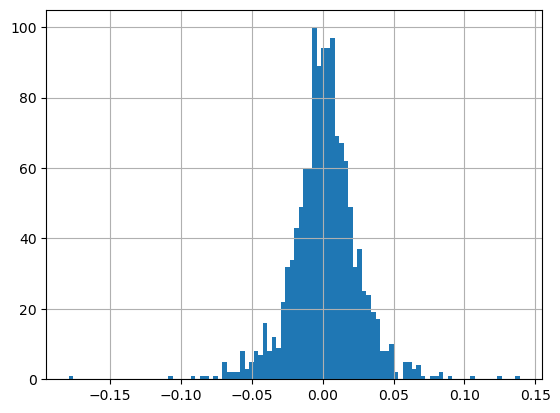

In [31]:
aapl_new['daily_pct_change'].hist(bins=100)

# Exercise

In [60]:
# Write a program to create an amortizing loan structure where you create an array (list) for each month of initial balance, payment, interest, repayment, and final balance

# Parameters
loan_amount = 100000
annual_int_rate = 0.12
periodicity = 12
N = 10

In [61]:
def amortizing_loan(loan_amount, annual_int_rate, periodicity, N):
    beginning_balance = loan_amount
    pmt = -npf.pmt(annual_int_rate / periodicity, N * periodicity, loan_amount, 0)
    amortization = []
    
    for i in range(N * periodicity):
        interest = beginning_balance * (annual_int_rate / periodicity)
        principal = pmt - interest
        ending_balance = beginning_balance - principal
        amortization.append([beginning_balance, pmt, interest, principal, ending_balance])
        beginning_balance = ending_balance
    return amortization

In [62]:
# Test the function
amortization = amortizing_loan(loan_amount, annual_int_rate, periodicity, N)
amortization

[[100000, 1434.709484025873, 1000.0, 434.70948402587305, 99565.29051597412],
 [99565.29051597412,
  1434.709484025873,
  995.6529051597412,
  439.0565788661319,
  99126.23393710799],
 [99126.23393710799,
  1434.709484025873,
  991.2623393710799,
  443.4471446547932,
  98682.78679245319],
 [98682.78679245319,
  1434.709484025873,
  986.8278679245319,
  447.88161610134114,
  98234.90517635185],
 [98234.90517635185,
  1434.709484025873,
  982.3490517635186,
  452.3604322623545,
  97782.5447440895],
 [97782.5447440895,
  1434.709484025873,
  977.825447440895,
  456.88403658497805,
  97325.66070750452],
 [97325.66070750452,
  1434.709484025873,
  973.2566070750452,
  461.4528769508279,
  96864.20783055369],
 [96864.20783055369,
  1434.709484025873,
  968.6420783055369,
  466.0674057203362,
  96398.14042483334],
 [96398.14042483334,
  1434.709484025873,
  963.9814042483334,
  470.7280797775396,
  95927.4123450558],
 [95927.4123450558,
  1434.709484025873,
  959.274123450558,
  475.4353605753

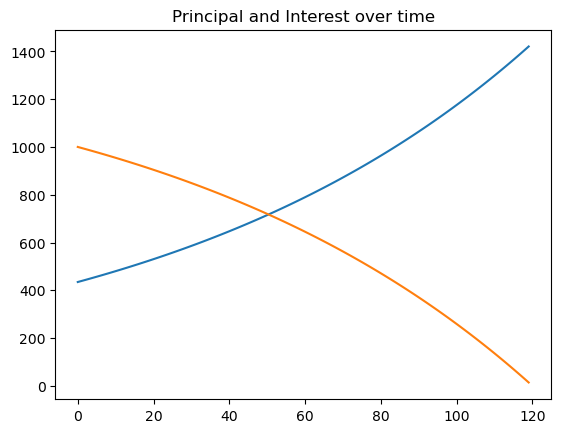

In [63]:
# Plot out the principal and interest over time
principal = [amortization[i][3] for i in range(len(amortization))]
interest = [amortization[i][2] for i in range(len(amortization))]
plt.title('Principal and Interest over time')
plt.plot(principal)
plt.plot(interest)

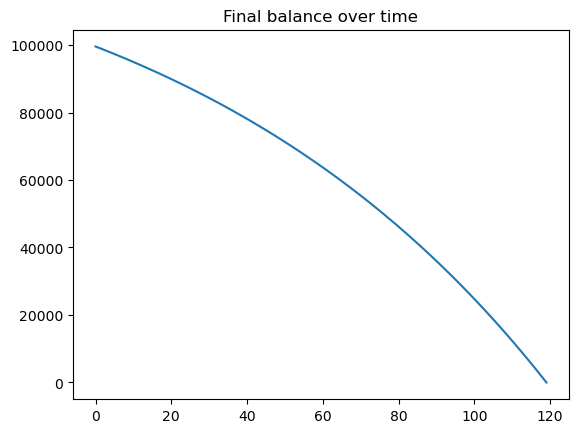

In [64]:
# Plot out the final balance over time
ending_balance = [amortization[i][4] for i in range(len(amortization))]
plt.title('Final balance over time')
plt.plot(ending_balance)

# PDF

In [65]:
# Create a function to plot a normal distribution
def plot_normal_dist(mean, std_dev, n):
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, n)
    y = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    plt.plot(x, y)
    plt.title('Normal Distribution')
    plt.grid(True)
    plt.show()

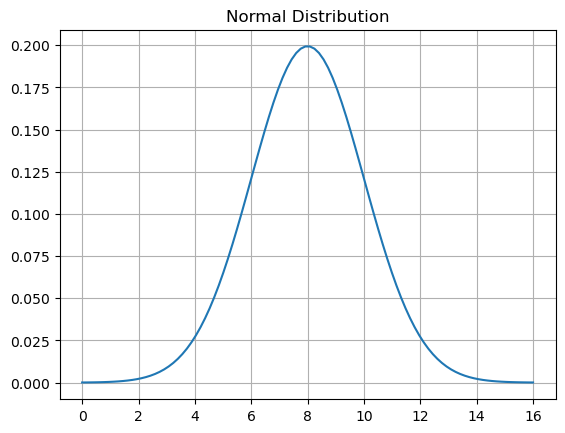

In [67]:
# Test the function
plot_normal_dist(8, 2, 100)